# Install Necessary Libraries

## Python Libraries for Analysis

In [1]:
%%capture
!pip install contextily

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import networkx as nx
import geopandas as gpd
import contextily as ctx

## Google Colab / GDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Network Analysis - Blog Post/'

In [5]:
out_path = '/content/drive/MyDrive/Network Analysis - Blog Post/Output/'

# Visualizing the Graph

In [6]:
# Reads the coordinates of substations
df1 = pd.read_csv(path + 'coord_min.csv')
df1.head()

,Substation,Latitude,Longitude
0,Agus 1,8.005010,124.285677
1,Agus 2,8.049967,124.273429
2,Agus 4,8.135205,124.202733
3,Agus 5,8.171726,124.195939
4,Agus 6,8.183817,124.193841


In [7]:
# Set the edges, following Mindanao MNM (Market Network Model)

edges = [('Agus 1', 'Agus 2'),
        ('Agus 2', 'Baloi'),
        ('Agus 2', 'Kibawe'),
        ('Agus 4', 'Baloi'),
        ('Agus 5', 'Aurora'),
        ('Agus 5', 'Baloi'),
        ('Agus 6', 'Baloi'),
        ('Aurora', 'Naga'),
        ('Aurora', 'Polanco'),
        ('Baloi', 'Aurora'),
        ('Baloi', 'Lugait'),
        ('Baloi', 'Tagoloan'),
        ('Baloi', 'Villanueva'),
        ('Bislig', 'Nabunturan'),
        ('Bunawan', 'Davao'),
        ('Butuan', 'Placer'),
        ('Butuan', 'San Francisco'),
        ('Culaman', 'Matanao'),
        ('FDC', 'Villanueva'),
        ('General Santos', 'Tacurong'),
        ('IDPP', 'Baloi'),
        ('IDPP', 'Lugait'),
        ('Jasaan', 'Butuan'),
        ('Jasaan', 'Nasipit'),
        ('Kamanga', 'General Santos'),
        ('Kauswagan', 'Baloi'),
        ('Kauswagan', 'Lala'),
        ('Kibawe', 'Davao'),
        ('Kibawe', 'Sultan Kudarat'),
        ('Kibawe', 'Tacurong'),
        ('Kidapawan', 'Matanao'),
        ('Lala', 'Aurora'),
        ('Lugait', 'Opol'),
        ('Maco', 'Bunawan'),
        ('Maco', 'Nabunturan'),
        ('Manolo Fortich', 'Maramag'),
        ('Manolo Fortich', 'Tagoloan'),
        ('Maramag', 'Bunawan'),
        ('Maramag', 'Kibawe'),
        ('Matanao', 'General Santos'),
        ('Matanao', 'Toril'),
        ('Nabunturan', 'Bunawan'),
        ('Naga', 'Zamboanga'),
        ('Nasipit', 'Butuan'),
        ('San Francisco', 'Bislig'),
        ('Tagoloan', 'Opol'),
        ('Tagoloan', 'Villanueva'),
        ('Therma Marine 1', 'Maco'),
        ('Therma Marine 2', 'Nasipit'),
        ('Toril', 'Bunawan'),
        ('Toril', 'Davao'),
        ('Villanueva', 'Jasaan'),
        ('Villanueva', 'Maramag'),
        ('WMPC', 'Zamboanga'),
        ('Zamboanga', 'Pitogo')]

In [8]:
# Set regions and colors
north_western = ['Aurora', 'Polanco', 'Naga', 'Zamboanga', 'Pitogo','WMPC']
lanao = ['Lugait', 'IDPP', 'Lala', 'Kauswagan', 'Agus 6', 'Agus 5', 'Agus 4', 'Baloi', 'Agus 2', 'Agus 1']
north_central = ['Jasaan', 'Villanueva', 'FDC', 'Opol', 'Tagoloan', 'Manolo Fortich', 'Maramag', 'Kibawe']
north_eastern = ['Therma Marine 2', 'Nasipit', 'Butuan', 'San Francisco', 'Placer', 'Bislig']
south_eastern = ['Therma Marine 1', 'Nabunturan', 'Maco', 'Bunawan', 'Toril', 'Davao', 'Matanao','Culaman']
south_western =  ['General Santos', 'Kidapawan', 'Tacurong', 'Sultan Kudarat','Kamanga']

## Mapping of Mindanao Network

In [9]:
# Create graph
def create_sample_graph():
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    G = nx.DiGraph()

    for index, row in gdf.iterrows():
        G.add_node(row['Substation'], pos=(row['geometry'].x, row['geometry'].y))

    for edge in edges:
        G.add_edge(edge[0], edge[1])

    return G

# Visualizes the graph
def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color=[node_colors[node] for node in G.nodes], node_size=200)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=8, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [10]:
G = create_sample_graph()

# Set node colors

node_colors = {}
for node in G.nodes:
    if node in north_western:
        node_colors[node] = 'red'
    elif node in lanao:
        node_colors[node] = 'blue'
    elif node in north_central:
        node_colors[node] = 'green'
    elif node in north_eastern:
        node_colors[node] = 'purple'
    elif node in south_eastern:
        node_colors[node] = 'orange'
    elif node in south_western:
        node_colors[node] = 'yellow'
    else:
        node_colors[node] = 'gray'

plt = draw_graph(G)
plt.savefig(out_path + 'Mindanao Grid.png' )

Output hidden; open in https://colab.research.google.com to view.

## Mindanao Network (no map overlay)

In [11]:
dG_min = nx.DiGraph()

In [12]:
dG_min.add_edges_from(edges)

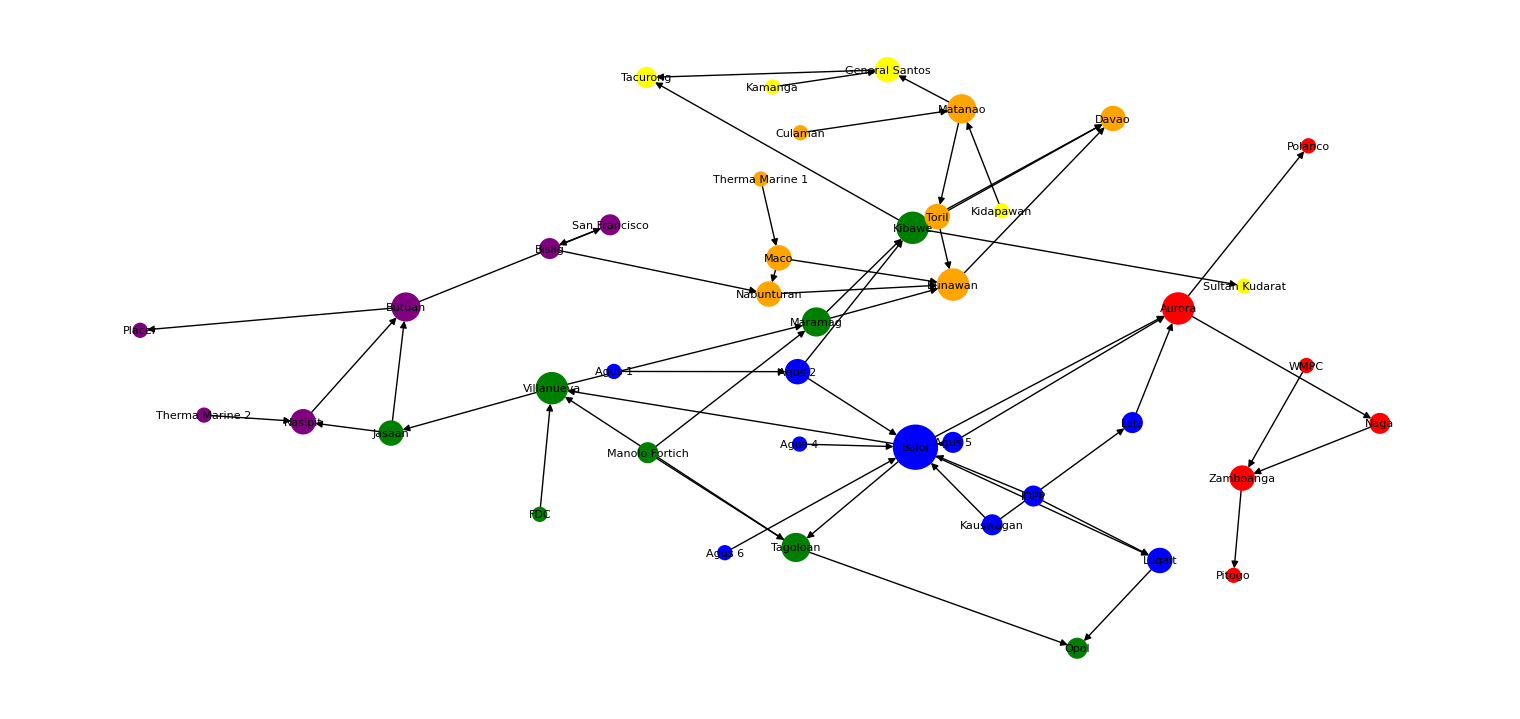

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

dG_min = nx.DiGraph()
dG_min.add_edges_from(edges)

# pos = nx.spectral_layout(dG_min)
pos = nx.spring_layout(dG_min, scale=20, k=3/np.sqrt(dG_min.order()), seed=333) #333
# pos = nx.spring_layout(dG_min, k=0.25, seed=42)

d = dict(dG_min.degree)
node_list = list(d.keys())

nx.draw(dG_min, pos, node_color=[node_colors[node] for node in dG_min.nodes],
        with_labels=True,
        nodelist=node_list,
        font_size=8,
        node_size=[d[k]*100 for k in d])

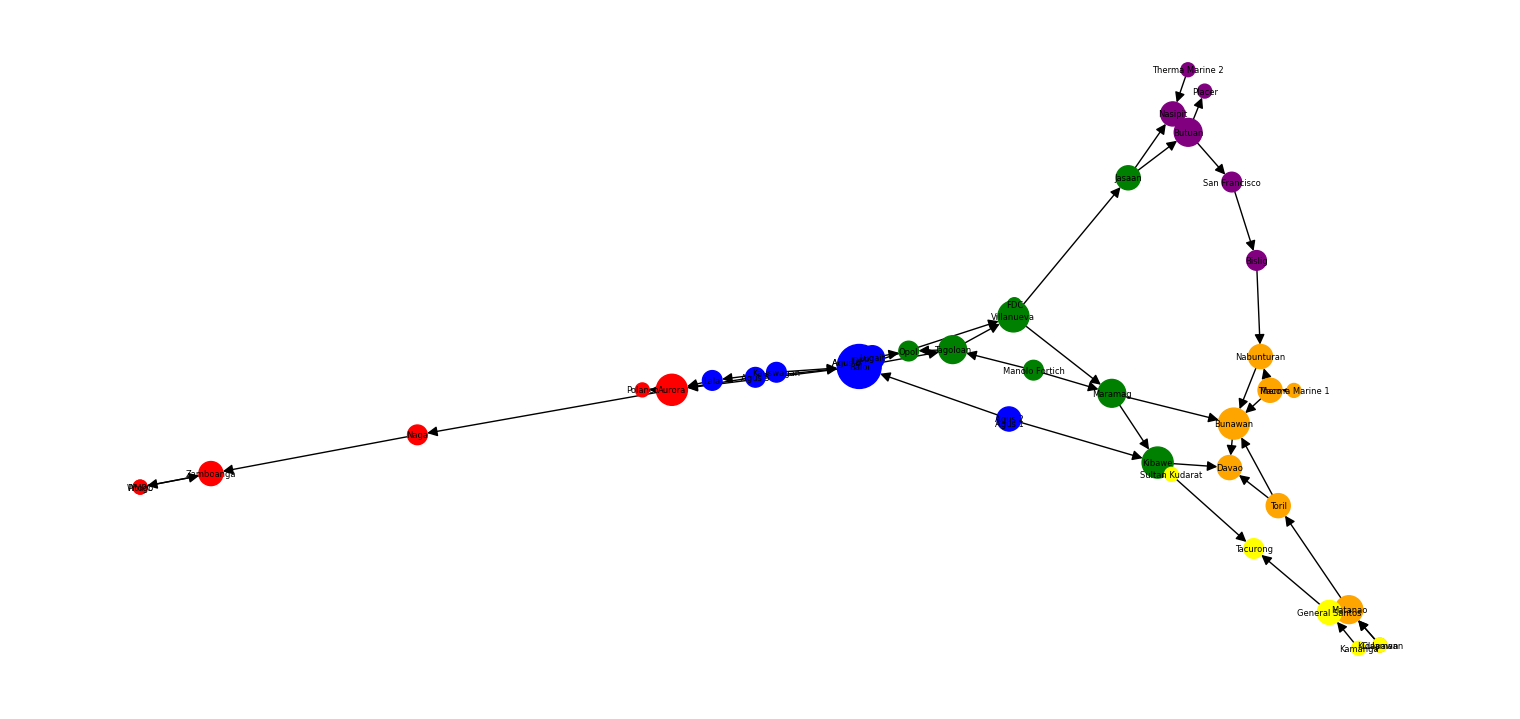

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

dG_min = nx.DiGraph()
dG_min.add_edges_from(edges)

pos = nx.spectral_layout(dG_min, scale=10)

d = dict(dG_min.degree)
node_list = list(d.keys())

nx.draw(dG_min, pos, node_color=[node_colors[node] for node in dG_min.nodes],
        with_labels=True,
        nodelist=node_list, arrowsize=15,
        font_size=6,
        node_size=[d[k]*100 for k in d])

# EDA - Degree Centrality Analysis

Basic Properties
Nodes:  43
Edges:  55
Minimum degree:  1
Maximum degree:  10
Average degree:  2.558139534883721
Not Strongly Connected
Average Clustering Coefficient:  0.05968992248062015


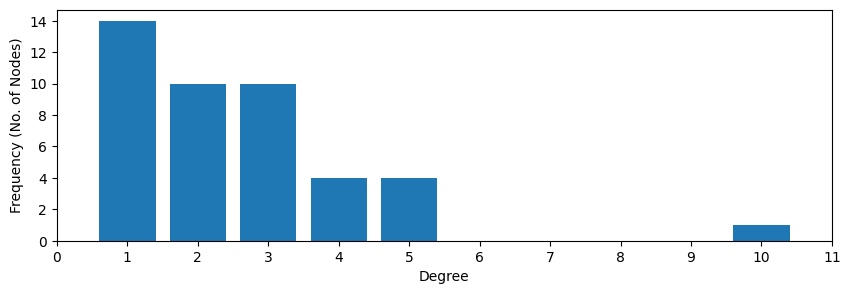

In [15]:
def eda_graph(G):

  print("Basic Properties")
  N = G.order()
  L = G.size()

  # avg_deg = float(L) / N

  print ('Nodes: ', N)
  print ('Edges: ', L)

  # print ('Average degree: ', avg_deg)

  degrees = [k for node, k in nx.degree(G)]
  k_min = np.min(degrees)
  k_max = np.max(degrees)
  k_avg = np.mean(degrees)

  print ('Minimum degree: ', k_min)
  print ('Maximum degree: ', k_max)
  print ('Average degree: ', k_avg)

  p, k = np.histogram([k for n,k in nx.degree(G)], bins=range(k_min, k_max+2));
  plt.figure(figsize=(10, 3))
  plt.bar(k[:-1],p)
  plt.xlabel('Degree')
  plt.ylabel('Frequency (No. of Nodes)')
  plt.xticks(range(k_min-1, k_max+2));

  try:
    print ('average_shortest_path_length: ', nx.average_shortest_path_length(G))
  except:
    print('Not Strongly Connected')

  cc = nx.clustering(G)
  avg_clust = sum(cc.values()) / len(cc)
  print ('Average Clustering Coefficient: ', avg_clust)

eda_graph(G)

In [16]:
df_edge = pd.DataFrame(list(dict(G.edges()).keys()))
df_edge.columns = ['from', 'to']
# df_edge.value_counts('out')

In [17]:
df_G = pd.DataFrame({'degree':dict(G.degree())}).sort_values(by='degree', ascending=False)
df_G['from'] = df_edge.value_counts('from')
df_G['to'] = df_edge.value_counts('to')
df_G = df_G.fillna(0)
df_G['from'] = df_G['from'].astype(int)
df_G.reset_index(inplace=True)
df_G.rename(columns={'index': 'Substation'}, inplace=True)

region_name = {}
for node in G.nodes:
    if node in north_western:
        region_name[node] = 'North Western'
    elif node in lanao:
        region_name[node] = 'Lanao'
    elif node in north_central:
        region_name[node] = 'North Central'
    elif node in north_eastern:
        region_name[node] = 'North Eastern'
    elif node in south_eastern:
        region_name[node] = 'South Eastern'
    elif node in south_western:
        region_name[node] = 'South_western'

df_G['Region'] = df_G['Substation'].map(region_name)
df_G

,Substation,degree,from,to,Region
0,Baloi,10,4,6.0,Lanao
1,Kibawe,5,3,2.0,North Central
2,Villanueva,5,2,3.0,North Central
3,Aurora,5,2,3.0,North Western
4,Bunawan,5,1,4.0,South Eastern
5,Tagoloan,4,2,2.0,North Central
6,Butuan,4,2,2.0,North Eastern
7,Matanao,4,2,2.0,South Eastern
8,Maramag,4,2,2.0,North Central
9,Lugait,3,1,2.0,Lanao


In [18]:
# Get max for each region
df_G.loc[df_G.groupby('Region')['degree'].idxmax()]

,Substation,degree,from,to,Region
0,Baloi,10,4,6.0,Lanao
1,Kibawe,5,3,2.0,North Central
6,Butuan,4,2,2.0,North Eastern
3,Aurora,5,2,3.0,North Western
4,Bunawan,5,1,4.0,South Eastern
18,General Santos,3,1,2.0,South_western


# Getting Affected Nodes

## Scenario 0 - Kidapawan-Matanao removed

In [19]:
edges_to_remove = [('Kidapawan','Matanao')]

### DFS (Depth First Search)

In [20]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [21]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Bunawan', 'Davao', 'General Santos', 'Matanao', 'Tacurong', 'Toril'}

In [22]:
plt = draw_graph(G, affected, edges_to_remove)

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [23]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [24]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Bunawan', 'Davao', 'General Santos', 'Matanao', 'Tacurong', 'Toril'}

In [25]:
plt = draw_graph(G, affected, edges_to_remove)

Output hidden; open in https://colab.research.google.com to view.

## Scenario 1 - Area 1 (North Western) - remove node with highest degree (Aurora)

In [26]:
edges_to_remove = [tuple_pair for tuple_pair in edges if 'Aurora' in tuple_pair]
edges_to_remove

[('Agus 5', 'Aurora'),
 ('Aurora', 'Naga'),
 ('Aurora', 'Polanco'),
 ('Baloi', 'Aurora'),
 ('Lala', 'Aurora')]

### DFS (Depth First Search)

In [27]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [28]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora', 'Naga', 'Pitogo', 'Polanco', 'Zamboanga'}

In [29]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario1_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [30]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [31]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora', 'Naga', 'Pitogo', 'Polanco', 'Zamboanga'}

In [32]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario1_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 2 - Area 2 (Lanao) - remove node with highest degree (Baloi)

In [33]:
edges_to_remove = [tuple_pair for tuple_pair in edges if 'Baloi' in tuple_pair]
edges_to_remove

[('Agus 2', 'Baloi'),
 ('Agus 4', 'Baloi'),
 ('Agus 5', 'Baloi'),
 ('Agus 6', 'Baloi'),
 ('Baloi', 'Aurora'),
 ('Baloi', 'Lugait'),
 ('Baloi', 'Tagoloan'),
 ('Baloi', 'Villanueva'),
 ('IDPP', 'Baloi'),
 ('Kauswagan', 'Baloi')]

### DFS (Depth First Search)

In [34]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [35]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora',
 'Baloi',
 'Bislig',
 'Bunawan',
 'Butuan',
 'Davao',
 'Jasaan',
 'Kibawe',
 'Lugait',
 'Maramag',
 'Nabunturan',
 'Naga',
 'Nasipit',
 'Opol',
 'Pitogo',
 'Placer',
 'Polanco',
 'San Francisco',
 'Sultan Kudarat',
 'Tacurong',
 'Tagoloan',
 'Villanueva',
 'Zamboanga'}

In [36]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario2_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [37]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [38]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora',
 'Baloi',
 'Bislig',
 'Bunawan',
 'Butuan',
 'Davao',
 'Jasaan',
 'Kibawe',
 'Lugait',
 'Maramag',
 'Nabunturan',
 'Naga',
 'Nasipit',
 'Opol',
 'Pitogo',
 'Placer',
 'Polanco',
 'San Francisco',
 'Sultan Kudarat',
 'Tacurong',
 'Tagoloan',
 'Villanueva',
 'Zamboanga'}

In [39]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario2_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 3 - Area 3 (North Central) - remove node with highest degree (Kibawe)

In [40]:
edges_to_remove = [tuple_pair for tuple_pair in edges if 'Kibawe' in tuple_pair]
edges_to_remove

[('Agus 2', 'Kibawe'),
 ('Kibawe', 'Davao'),
 ('Kibawe', 'Sultan Kudarat'),
 ('Kibawe', 'Tacurong'),
 ('Maramag', 'Kibawe')]

### DFS (Depth First Search)

In [41]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [42]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Davao', 'Kibawe', 'Sultan Kudarat', 'Tacurong'}

In [43]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario3_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [44]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [45]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Davao', 'Kibawe', 'Sultan Kudarat', 'Tacurong'}

In [46]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario3_BFS.png')

Output hidden; open in https://colab.research.google.com to view.

## Scenario 4 - Area 4 (North Eastern) - remove node with highest degree (Butuan)

In [47]:
edges_to_remove = [tuple_pair for tuple_pair in edges if 'Butuan' in tuple_pair]
edges_to_remove

[('Butuan', 'Placer'),
 ('Butuan', 'San Francisco'),
 ('Jasaan', 'Butuan'),
 ('Nasipit', 'Butuan')]

### DFS (Depth First Search)

In [48]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [49]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Bislig',
 'Bunawan',
 'Butuan',
 'Davao',
 'Nabunturan',
 'Placer',
 'San Francisco'}

In [50]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario4_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [51]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [52]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Bislig',
 'Bunawan',
 'Butuan',
 'Davao',
 'Nabunturan',
 'Placer',
 'San Francisco'}

In [53]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario4_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 5 - Area 5 (South Eastern) - remove node with highest degree (Bunawan)

In [54]:
edges_to_remove = [tuple_pair for tuple_pair in edges if 'Bunawan' in tuple_pair]
edges_to_remove

[('Bunawan', 'Davao'),
 ('Maco', 'Bunawan'),
 ('Maramag', 'Bunawan'),
 ('Nabunturan', 'Bunawan'),
 ('Toril', 'Bunawan')]

### DFS (Depth First Search)

In [55]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [56]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Bunawan', 'Davao'}

In [57]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario5_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [58]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [59]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Bunawan', 'Davao'}

In [60]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario5_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 6 - Area 6 (South Western) - remove node with highest degree (General Santos)

In [61]:
edges_to_remove = [tuple_pair for tuple_pair in edges if 'General Santos' in tuple_pair]
edges_to_remove

[('General Santos', 'Tacurong'),
 ('Kamanga', 'General Santos'),
 ('Matanao', 'General Santos')]

### DFS (Depth First Search)

In [62]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [63]:
affected = affected_nodes(G, edges_to_remove)
affected

{'General Santos', 'Tacurong'}

In [64]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario6_DFS.png')

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [65]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [66]:
affected = affected_nodes(G, edges_to_remove)
affected

{'General Santos', 'Tacurong'}

In [67]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario6_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 7 - NGCP Report Baloi to Aurora connection tripped because of bombing

https://powerphilippines.com/ngcp-tower-topples-after-bombing-incident-in-mindanao/

In [68]:
edges_to_remove = [('Baloi', 'Aurora')]

### DFS (Depth First Search)

In [69]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [70]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora', 'Naga', 'Pitogo', 'Polanco', 'Zamboanga'}

In [71]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario7_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [72]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [73]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora', 'Naga', 'Pitogo', 'Polanco', 'Zamboanga'}

In [74]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario7_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 8 - Report - Agus 5-Aurora, Baloi-Aurora

In [75]:
edges_to_remove = [('Agus 5', 'Aurora'),('Baloi', 'Aurora')]

### DFS (Depth First Search)

In [76]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [77]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora', 'Naga', 'Pitogo', 'Polanco', 'Zamboanga'}

In [78]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario8_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [79]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [80]:
affected = affected_nodes(G, edges_to_remove)
affected

{'Aurora', 'Naga', 'Pitogo', 'Polanco', 'Zamboanga'}

In [81]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario8_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

## Scenario 9 - Report - Matanao-Gensan

In [82]:
edges_to_remove = [('Matanao', 'General Santos')]

### DFS (Depth First Search)

In [83]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        for node in nx.dfs_preorder_nodes(G, source=target):
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [84]:
affected = affected_nodes(G, edges_to_remove)
affected

{'General Santos', 'Tacurong'}

In [85]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario9_DFS.png' )

Output hidden; open in https://colab.research.google.com to view.

### BFS (Breadth First Search)

In [86]:
def affected_nodes(G, edges_to_remove):
    affected = set()
    for edge in edges_to_remove:
        source, target = edge
        # Create a BFS tree and get the nodes
        bfs_tree = nx.bfs_tree(G, source=target)
        for node in bfs_tree:
            affected.add(node)
    return affected

def affected_edges(G, affected_nodes):
    affected_edges = set()
    for node in affected_nodes:
        for edge in G.edges(node):
            affected_edges.add(edge)
    return affected_edges

def draw_graph(G, affected_nodes=set(), removed_edges=set()):
    fig, ax = plt.subplots(figsize=(20, 20), dpi = 500)  # Adjust the canvas size
    gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.Longitude, df1.Latitude))
    gdf.crs = 'EPSG:4326'

    pos = nx.get_node_attributes(G, 'pos')

    nx.draw(G, pos, with_labels=False, width=2, edge_color='#474747', node_color='#FFC125', node_size=200)

    # Draw removed edges as broken lines
    for edge in removed_edges:
        source, target = edge
        if source in pos and target in pos:
            xs, ys = pos[source]
            xt, yt = pos[target]
            plt.plot([xs, xt], [ys, yt], color='red', linewidth=2, linestyle='dashed')

    nx.draw_networkx_nodes(G, pos, nodelist=affected_nodes, node_color='red', node_size=500)

    # Draw affected edges in red
    affected_edges_list = affected_edges(G, affected_nodes)
    nx.draw_networkx_edges(G, pos, edgelist=affected_edges_list, edge_color='red', width=2)

    # Adjust label positions
    label_pos = {k: (v[0], v[1] + 0.01) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=10, font_family='sans-serif', font_color="black", font_weight="bold")

    plt.axis('off')
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    return plt

In [87]:
affected = affected_nodes(G, edges_to_remove)
affected

{'General Santos', 'Tacurong'}

In [88]:
plt = draw_graph(G, affected, edges_to_remove)
plt.savefig(out_path + 'Scenario9_BFS.png' )

Output hidden; open in https://colab.research.google.com to view.

# Community Strength

In [89]:
def check_community_strength(community, G):
  internal_connections = 0
  external_connections = 0
  for node in community:
        for neighbor in G.neighbors(node):
            if neighbor in community:
                internal_connections += 1
            else:
                external_connections += 1
        if external_connections > internal_connections:
            return 'Weak community'
  return 'Strong community'

# call the function to check the community strength
print('Mindanao Grid: ', check_community_strength(G.nodes(), G))

# Define a function to calculate the community strength for a given region
def calculate_community_strength(region, G):
    community = region
    return check_community_strength(community, G)

# Calculate the community strength for each region
north_western_community_strength = calculate_community_strength(north_western, G)
lanao_community_strength = calculate_community_strength(lanao, G)
north_central_community_strength = calculate_community_strength(north_central, G)
north_eastern_community_strength = calculate_community_strength(north_eastern, G)
south_eastern_community_strength = calculate_community_strength(south_eastern, G)
south_western_community_strength = calculate_community_strength(south_western, G)

# Print the community strength for each region
print("Northwestern community strength:", north_western_community_strength)
print("Lanao community strength:", lanao_community_strength)
print("North central community strength:", north_central_community_strength)
print("North eastern community strength:", north_eastern_community_strength)
print("South eastern community strength:", south_eastern_community_strength)
print("South western community strength:", south_western_community_strength)

Mindanao Grid:  Strong community
Northwestern community strength: Strong community
Lanao community strength: Weak community
North central community strength: Weak community
North eastern community strength: Strong community
South eastern community strength: Strong community
South western community strength: Strong community
